In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['sample-submission', 'ronaldo']


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv('../input/ronaldo/data.csv')

In [4]:
df.head(20)


,Unnamed: 0,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,is_goal,area_of_shot,shot_basics,range_of_shot,team_name,date_of_game,home/away,shot_id_number,lat/lng,type_of_shot,type_of_combined_shot,match_id,team_id,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1
0,0,10.0,167.0,72.0,10.0,1.0,0.0,2000-01,27.0,38.0,NaN,Right Side(R),Mid Range,16-24 ft.,Manchester United,2000-10-31,MANU @ POR,1.0,"45.539131, -122.651648",shot - 30,NaN,20000012,1610612747,10.00,1.00,50.608,54.2000,38.0
1,1,12.0,-157.0,0.0,10.0,1.0,0.0,2000-01,22.0,35.0,0.0,Left Side(L),Mid Range,8-16 ft.,Manchester United,2000-10-31,MANU @ POR,2.0,"45.539131, -122.651648",shot - 45,NaN,20000012,1610612747,10.00,1.00,28.800,22.0000,35.0
2,2,35.0,-101.0,135.0,7.0,1.0,0.0,2000-01,45.0,36.0,1.0,Left Side Center(LC),Mid Range,16-24 ft.,Manchester United,2000-10-31,NaN,3.0,"45.539131, -122.651648",shot - 25,NaN,20000012,1610612747,92.64,1.00,0.000,63.7216,54.4
3,3,43.0,138.0,175.0,6.0,1.0,0.0,2000-01,52.0,42.0,0.0,Right Side Center(RC),Mid Range,16-24 ft.,Manchester United,2000-10-31,MANU @ POR,4.0,"45.539131, -122.651648",NaN,shot - 3,20000012,1610612747,NaN,1.00,122.608,52.0000,42.0
4,4,155.0,0.0,0.0,NaN,2.0,0.0,2000-01,19.0,20.0,1.0,Center(C),Goal Area,Less Than 8 ft.,NaN,2000-10-31,MANU @ POR,5.0,"45.539131, -122.651648",NaN,shot - 1,20000012,1610612747,42.64,2.00,0.000,19.0000,20.0
5,5,244.0,-145.0,-11.0,9.0,3.0,0.0,NaN,32.0,34.0,0.0,Left Side(L),Mid Range,8-16 ft.,Manchester United,2000-10-31,MANU @ POR,6.0,"45.539131, -122.651648",shot - 17,NaN,20000012,1610612747,9.00,3.00,0.000,NaN,34.0
6,6,251.0,0.0,0.0,8.0,NaN,0.0,2000-01,52.0,20.0,1.0,Center(C),Goal Area,Less Than 8 ft.,Manchester United,2000-10-31,MANU @ POR,7.0,"45.539131, -122.651648",NaN,shot - 4,20000012,1610612747,8.00,3.00,0.000,112.2000,89.4
7,7,254.0,1.0,28.0,8.0,3.0,0.0,2000-01,5.0,22.0,NaN,Center(C),Goal Area,Less Than 8 ft.,Manchester United,2000-10-31,MANU @ POR,8.0,"45.539131, -122.651648",NaN,shot - 3,20000012,1610612747,68.64,3.00,0.000,5.0000,22.0
8,8,265.0,-65.0,NaN,6.0,3.0,0.0,2000-01,12.0,32.0,1.0,Left Side(L),Goal Line,8-16 ft.,Manchester United,2000-10-31,MANU @ POR,9.0,"45.539131, -122.651648",shot - 36,NaN,20000012,1610612747,6.00,3.00,0.000,12.0000,32.0
9,9,294.0,-33.0,NaN,3.0,3.0,0.0,2000-01,36.0,32.0,0.0,Center(C),Goal Line,8-16 ft.,Manchester United,2000-10-31,MANU @ POR,10.0,"45.539131, -122.651648",shot - 44,NaN,20000012,1610612747,3.00,3.00,0.000,52.2000,NaN


In [5]:
df.describe()

,Unnamed: 0,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,remaining_sec,distance_of_shot,is_goal,shot_id_number,match_id,team_id,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1
count,30697.000000,29134.000000,29236.000000,29157.000000,29135.000000,29211.000000,29180.000000,29103.000000,29130.000000,24429.000000,29134.000000,3.069700e+04,3.069700e+04,29162.000000,29158.000000,29204.000000,29158.000000,29129.000000
mean,15348.000000,249.576028,7.383876,91.126933,4.883233,2.519359,0.145956,28.329382,33.448884,0.445331,15368.581039,2.476407e+07,1.610613e+09,18.204615,15.994109,16.599402,39.027303,38.801852
std,8861.604943,150.186019,110.263049,87.676395,3.452533,1.153976,0.353068,17.470663,9.369656,0.497013,8866.520772,7.755175e+06,0.000000e+00,29.416973,29.676815,35.172016,29.835284,18.787711
min,0.000000,2.000000,-250.000000,-44.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,2.000001e+07,1.610613e+09,0.000000,1.000000,0.000000,0.000000,9.400000
25%,7674.000000,111.000000,-68.000000,4.000000,2.000000,1.000000,0.000000,13.000000,25.000000,0.000000,7693.250000,2.050008e+07,1.610613e+09,3.000000,2.000000,0.000000,17.000000,26.000000
50%,15348.000000,254.000000,0.000000,74.000000,5.000000,3.000000,0.000000,28.000000,35.000000,0.000000,15378.500000,2.090035e+07,1.610613e+09,6.000000,3.000000,0.000000,35.000000,36.000000
75%,23022.000000,369.000000,95.000000,160.000000,8.000000,3.000000,0.000000,43.000000,41.000000,1.000000,23055.750000,2.960047e+07,1.610613e+09,11.000000,4.000000,1.000000,52.000000,44.000000
max,30696.000000,659.000000,248.000000,791.000000,11.000000,7.000000,1.000000,59.000000,99.000000,1.000000,30697.000000,4.990009e+07,1.610613e+09,128.761600,118.360000,141.352320,144.785600,115.728000


In [6]:
df.apply(lambda x: sum(x.isnull()))

Unnamed: 0                   0
match_event_id            1563
location_x                1461
location_y                1540
remaining_min             1562
power_of_shot             1486
knockout_match            1517
game_season               5862
remaining_sec             1594
distance_of_shot          1567
is_goal                   6268
area_of_shot              1502
shot_basics               1575
range_of_shot             1564
team_name                 1535
date_of_game              1550
home/away                 1497
shot_id_number            1563
lat/lng                   1565
type_of_shot             15280
type_of_combined_shot    15417
match_id                     0
team_id                      0
remaining_min.1           1535
power_of_shot.1           1539
knockout_match.1          1493
remaining_sec.1           1539
distance_of_shot.1        1568
dtype: int64

In [7]:
df['shot_id_number'].replace(np.nan, df['Unnamed: 0'] + 1, inplace = True)

In [8]:
submission = pd.read_csv('../input/sample-submission/sample_submission.csv')

In [9]:
test_df = df[df['shot_id_number'].isin(submission['shot_id_number'])]

In [10]:
train_df = df[~df['shot_id_number'].isin(submission['shot_id_number'])]

In [11]:
df['type_of_shot'] = df['type_of_shot'].fillna(df['type_of_combined_shot'])

In [12]:
df['location_x'].nunique()

488

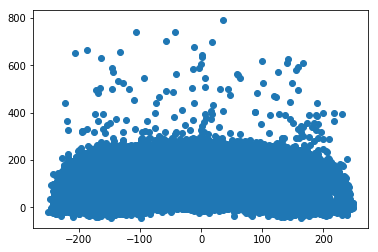

In [13]:
plt.scatter(df['location_x'], df['location_y'])

In [14]:
df['location_x'] = df['location_x'].fillna(df['location_x'].mean())

In [15]:
avg_location_y = df.pivot_table(values = 'location_y', index = 'location_x')
miss_bool = df['location_y'].isnull()

In [16]:
df.loc[miss_bool, 'location_y'] = df.loc[miss_bool, 'location_x'].apply(lambda x: avg_location_y.at[x, 'location_y'])

In [17]:
df['remaining_min'].value_counts()

0.0     3681
4.0     2709
3.0     2698
2.0     2688
1.0     2600
5.0     2508
6.0     2256
7.0     2094
9.0     2089
8.0     2028
10.0    2016
11.0    1768
Name: remaining_min, dtype: int64

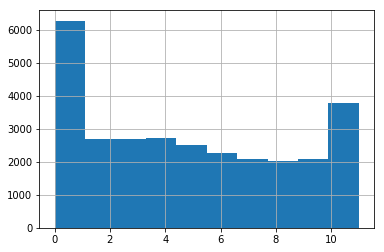

In [18]:
df['remaining_min'].hist()

In [19]:
df['remaining_min'] = df['remaining_min'].fillna(df['remaining_min'].median())

In [20]:
df['power_of_shot'].value_counts()

3.0    7885
1.0    7659
4.0    6910
2.0    6399
5.0     314
6.0      37
7.0       7
Name: power_of_shot, dtype: int64

In [21]:
avg_power_of_shot = df.pivot_table(values = 'power_of_shot', index = 'type_of_shot')
miss_bool = df['power_of_shot'].isnull()
df.loc[miss_bool, 'power_of_shot'] = df.loc[miss_bool, 'type_of_shot'].apply(lambda x: avg_power_of_shot.at[x, 'power_of_shot'])

In [22]:
df['power_of_shot'] = df['power_of_shot'].astype(int)

In [23]:
df['knockout_match'].value_counts()

0.0    24921
1.0     4259
Name: knockout_match, dtype: int64

In [24]:
df['knockout_match'] = df['knockout_match'].fillna(0)

In [25]:
df['game_season_shift'] = df.game_season.shift(periods = 1)

In [26]:
df['game_season'] = df['game_season'].fillna(df['game_season_shift'])

In [27]:
df['game_season_shift'] = df.game_season.shift(periods = 2)

In [28]:
df['game_season'] = df['game_season'].fillna(df['game_season_shift'])

In [29]:
df['game_season_shift'] = df.game_season.shift(periods = 3)

In [30]:
df['game_season'] = df['game_season'].fillna(df['game_season_shift'])

In [31]:
df['remaining_sec'] = df['remaining_sec'].fillna(df['remaining_sec'].median())

In [32]:
avg_distance_of_shot = df.pivot_table(values = 'distance_of_shot', index = 'type_of_shot')
miss_bool = df['distance_of_shot'].isnull()
df.loc[miss_bool, 'distance_of_shot'] = df.loc[miss_bool, 'type_of_shot'].apply(lambda x: avg_distance_of_shot.at[x, 'distance_of_shot'])

In [33]:
df['distance_of_shot'] = df['distance_of_shot'].replace(31.981034, 32).astype(int)

In [34]:
df['area_of_shot'].value_counts()

Center(C)                12761
Right Side Center(RC)     4562
Right Side(R)             4370
Left Side Center(LC)      3848
Left Side(L)              3573
Mid Ground(MG)              81
Name: area_of_shot, dtype: int64

In [35]:
df['area_of_shot'] = df['area_of_shot'].fillna('Center(C)')

In [36]:
df['home/away'].value_counts()

MANU @ SAS      971
MANU vs. SAS    890
MANU @ SAC      845
MANU @ DEN      832
MANU vs. HOU    828
MANU @ PHX      825
MANU vs. PHX    805
MANU @ HOU      756
MANU @ POR      755
MANU vs. DEN    729
MANU vs. POR    718
MANU vs. SAC    718
MANU @ MIN      710
MANU vs. UTA    704
MANU @ UTA      694
MANU vs. MIN    693
MANU @ GSW      655
MANU vs. GSW    642
MANU vs. LAC    620
MANU @ LAC      593
MANU @ DAL      578
MANU vs. DAL    542
MANU @ BOS      497
MANU @ MEM      490
MANU vs. MEM    486
MANU @ SEA      410
MANU vs. BOS    404
MANU @ ORL      399
MANU vs. IND    394
MANU vs. SEA    383
               ... 
MANU vs. ORL    293
MANU @ CHI      292
MANU vs. CHI    291
MANU vs. MIL    288
MANU @ ATL      288
MANU @ MIA      284
MANU vs. NOH    280
MANU vs. CLE    275
MANU @ NJN      270
MANU @ MIL      269
MANU @ NOH      266
MANU vs. WAS    256
MANU vs. NJN    229
MANU @ CHA      214
MANU vs. CHA    213
MANU vs. ATL    207
MANU @ VAN      126
MANU @ NOK      122
MANU vs. VAN    111


In [37]:
df['shot_basics'] = df['shot_basics'].fillna('Mid Range')

In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['shot_basics'] = le.fit_transform(df['shot_basics'])
df['range_of_shot'] = df['range_of_shot'].astype(str)
le_1 = LabelEncoder()
df['range_of_shot'] = le.fit_transform(df['range_of_shot'])
avg_range_of_shot = df.pivot_table(values = 'range_of_shot', index = ['shot_basics', 'distance_of_shot'])
miss_bool = df['range_of_shot'].isnull()
df.loc[miss_bool, 'range_of_shot'] = df.loc[miss_bool, ('shot_basics', 'distance_of_shot')].apply(lambda x: avg_range_of_shot.at[x, 'range_of_shot'])

In [39]:
df['team_name'] = df['team_name'].fillna('Manchester United')

In [40]:
df.columns

Index(['Unnamed: 0', 'match_event_id', 'location_x', 'location_y',
       'remaining_min', 'power_of_shot', 'knockout_match', 'game_season',
       'remaining_sec', 'distance_of_shot', 'is_goal', 'area_of_shot',
       'shot_basics', 'range_of_shot', 'team_name', 'date_of_game',
       'home/away', 'shot_id_number', 'lat/lng', 'type_of_shot',
       'type_of_combined_shot', 'match_id', 'team_id', 'remaining_min.1',
       'power_of_shot.1', 'knockout_match.1', 'remaining_sec.1',
       'distance_of_shot.1', 'game_season_shift'],
      dtype='object')

In [41]:
df = df.drop(['Unnamed: 0', 'match_event_id', 'team_name', 'date_of_game',
       'home/away', 'lat/lng', 'type_of_combined_shot', 'match_id', 'team_id', 'remaining_min.1',
       'power_of_shot.1', 'knockout_match.1', 'remaining_sec.1',
       'distance_of_shot.1'], axis = 1)

In [42]:
train_df['is_goal'].value_counts()

0.0    13550
1.0    10879
Name: is_goal, dtype: int64

In [43]:
test_df = df[df['shot_id_number'].isin(submission['shot_id_number'])]

In [44]:
train_df = df[~df['shot_id_number'].isin(submission['shot_id_number'])]

In [45]:
train_df.apply(lambda x: sum(x.isnull()))

location_x              0
location_y              0
remaining_min           0
power_of_shot           0
knockout_match          0
game_season             0
remaining_sec           0
distance_of_shot        0
is_goal              1268
area_of_shot            0
shot_basics             0
range_of_shot           0
shot_id_number          0
type_of_shot            0
game_season_shift      27
dtype: int64

In [46]:
train_df.loc[:,'is_goal'] = train_df['is_goal'].fillna(0)

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [47]:
train_y = train_df.iloc[: , 8].values

In [48]:
train_X = train_df.iloc[:,:]

In [49]:
id_col = test_df['shot_id_number']

In [50]:
test_df = test_df.drop(['shot_id_number'], axis = 1)

In [51]:
test_X = test_df.iloc[:, :]

In [52]:
from sklearn.naive_bayes import GaussianNB
from sklearn.calibration import CalibratedClassifierCV

In [53]:
train_df.head()

,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,is_goal,area_of_shot,shot_basics,range_of_shot,shot_id_number,type_of_shot,game_season_shift
1,-157.0,0.0,10.0,1,0.0,2000-01,22.0,35,0.0,Left Side(L),4,2.0,2.0,shot - 45,NaN
2,-101.0,135.0,7.0,1,0.0,2000-01,45.0,36,1.0,Left Side Center(LC),4,0.0,3.0,shot - 25,NaN
3,138.0,175.0,6.0,1,0.0,2000-01,52.0,42,0.0,Right Side Center(RC),4,0.0,4.0,shot - 3,2000-01
4,0.0,0.0,5.0,2,0.0,2000-01,19.0,20,1.0,Center(C),0,4.0,5.0,shot - 1,2000-01
5,-145.0,-11.0,9.0,3,0.0,2000-01,32.0,34,0.0,Left Side(L),4,2.0,6.0,shot - 17,2000-01


In [54]:
train_df = train_df.drop(['game_season_shift'], axis = 1)

In [55]:
train_X.loc[:,'game_season'] = train_X['game_season'].astype(str)

In [56]:
test_X.loc[:,'game_season'] = test_X['game_season'].astype(str)

In [57]:
train_X.loc[:,'area_of_shot'] = train_X['area_of_shot'].astype(str)

In [58]:
test_X.loc[:,'area_of_shot'] = test_X['area_of_shot'].astype(str)

In [59]:
train_X.loc[:,'type_of_shot'] = train_X['type_of_shot'].astype(str)
test_X.loc[:,'type_of_shot'] = test_X['type_of_shot'].astype(str)

In [60]:
le_game_season = LabelEncoder()
le_area_of_shot = LabelEncoder()
le_type_of_shot = LabelEncoder()
train_X.loc[:,'game_season'] = le_game_season.fit_transform(train_X['game_season'])
test_X.loc[:,'game_season'] = le_game_season.transform(test_X['game_season'])
train_X.loc[:,'area_of_shot'] = le_area_of_shot.fit_transform(train_X['area_of_shot'])
test_X.loc[:,'area_of_shot'] = le_area_of_shot.transform(test_X['area_of_shot'])
train_X.loc[:,'type_of_shot'] = le_type_of_shot.fit_transform(train_X['type_of_shot'])
test_X.loc[:,'type_of_shot'] = le_type_of_shot.transform(test_X['type_of_shot'])

In [61]:
train_X = train_X.drop(['game_season_shift'], axis = 1)
test_X = test_X.drop(['game_season_shift'], axis = 1)

In [62]:
test_X = test_X.drop(['is_goal'], axis = 1)

In [63]:
train_X = train_X.drop(['is_goal'], axis = 1)
train_X = train_X.drop(['shot_id_number'], axis = 1)

In [64]:
train_X.head()

,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,area_of_shot,shot_basics,range_of_shot,type_of_shot
1,-157.0,0.0,10.0,1,0.0,4,22.0,35,2,4,2.0,40
2,-101.0,135.0,7.0,1,0.0,4,45.0,36,1,4,0.0,18
3,138.0,175.0,6.0,1,0.0,4,52.0,42,4,4,0.0,23
4,0.0,0.0,5.0,2,0.0,4,19.0,20,0,0,4.0,1
5,-145.0,-11.0,9.0,3,0.0,4,32.0,34,2,4,2.0,9


In [65]:
test_X.head()

,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,area_of_shot,shot_basics,range_of_shot,type_of_shot
0,167.0,72.0,10.0,1,0.0,4,27.0,38,5,4,0.0,24
7,1.0,28.0,8.0,3,0.0,4,5.0,22,0,0,4.0,23
16,0.0,0.0,0.0,1,0.0,4,1.0,20,0,0,4.0,34
19,0.0,0.0,10.0,3,0.0,4,46.0,20,0,4,4.0,34
32,163.0,76.0,11.0,1,0.0,4,26.0,37,5,4,0.0,28


In [66]:
train_X.shape

(25697, 12)

In [67]:
clf = GaussianNB()
clf.fit(train_X, train_y)
y_pred = clf.predict_proba(test_X)

In [68]:
result = pd.concat((submission['shot_id_number'], pd.DataFrame(y_pred)), axis = 1)

In [69]:
result.to_csv('ronaldo_pred', index=False)